# Neuron Network

- **Neuron Network**: Build up by multiple layers, each layer have nodes. And each node got a function called 'Activate Function". And the input will be applied by this function to get output

### Neuron Network Types

#### Single Layer

![Image](./image/SingleLayer.png)

#### Multiple Layer

![Image](./image/MultipleLayer.png)

#### Layer Computation

![Image](./image/HiddenLayer.png)

- Each neuron in the hidden layer functions similarly to a machine learning module, equipped with its own set of parameters (weights $w$ and bias $b$), and computes an activation value $a$.

- **Activation Function**: Utilizes the function. Ex: logistic function $g(z) = \frac{1}{1 + e^{-z}}$, where $z = w \cdot x + b$.

- **Activation Values**: Each neuron outputs an activation value $a_i$, calculated from its function. These values represent more abstract features or concepts derived from the input features. The result of previous layer will be the input of the next layer. 


### Whether the model is overfitting or underfitting ?

#### Split the Dataset
- We split it into 2 set (Train & Test)

| Loss_Train       | Loss_Test       | Result          |
|------------------|-----------------|-----------------|
| Small            | Big             | Overfitting     |
| Big              | Not Specified   | Underfitting    |
| Small            | Small           | Well-fitted     |


### How can we choose amount of parameters for the function ?

- Split the dataset into three subsets: training set, cross-validation set, and test set with ratios of 60%/20%/20%. 

- We will train the model using the training set, then select the most suitable model with the cross-validation set. Finally, the test set is used to assess the model's error with new data.

| $J_{train}$ | $J_{cv}$ | Model      |
|-------------------|----------------|----------------------|
| Large             | Large          | High Bias (Underfitting) |
| Small             | Large          | High Variance (Overfitting)|
| Small             | Small          | Well-fitted         |

![Image](./image/BiasVariance.png)

![Image](./image/ModifyNetwork.png)

### Example: Digit Number Recognizer

#### Import library

In [15]:
import pandas as pd 
import numpy as np 
import tensorflow as tf 
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

#### Load Data

In [16]:
data = pd.read_csv('./Dataset.csv')
X_value = tf.convert_to_tensor(data.drop(['label'], axis = 1))
Y_value = tf.convert_to_tensor(data['label'])
Y_value = to_categorical(Y_value, num_classes=10)


train_test_ratio = 0.7 

X_train = X_value[:int(len(X_value) * train_test_ratio)]
Y_train = Y_value[:int(len(Y_value) * train_test_ratio)]

X_test = X_value[int(len(X_value) * train_test_ratio):]
Y_test = Y_value[int(len(Y_value) * train_test_ratio):]

print(X_train.shape, Y_train.shape)

(7000, 784) (7000, 10)


#### Module Creation

In [17]:
image_shape = (784)  

model = Sequential([
    Input(shape=image_shape),
    Dense(250, activation='sigmoid'),
    Dense(100, activation='sigmoid'), 
    Dense(20, activation='sigmoid'), 
    Dense(10, activation='softmax')
])

model.compile(Adam(learning_rate = 1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

#### Train module

In [18]:
history = model.fit(X_train, Y_train, epochs= 20, batch_size= 128)

Epoch 1/20
55/55 [==============================] - 0s 2ms/step - loss: 2.0232 - accuracy: 0.5006
Epoch 2/20
55/55 [==============================] - 0s 2ms/step - loss: 1.5105 - accuracy: 0.7196
Epoch 3/20
55/55 [==============================] - 0s 2ms/step - loss: 1.1797 - accuracy: 0.8127
Epoch 4/20
55/55 [==============================] - 0s 2ms/step - loss: 0.9464 - accuracy: 0.8523
Epoch 5/20
55/55 [==============================] - 0s 2ms/step - loss: 0.7726 - accuracy: 0.8824
Epoch 6/20
55/55 [==============================] - 0s 3ms/step - loss: 0.6549 - accuracy: 0.8936
Epoch 7/20
55/55 [==============================] - 0s 2ms/step - loss: 0.5754 - accuracy: 0.9031
Epoch 8/20
55/55 [==============================] - 0s 2ms/step - loss: 0.5118 - accuracy: 0.9049
Epoch 9/20
55/55 [==============================] - 0s 2ms/step - loss: 0.4625 - accuracy: 0.9083
Epoch 10/20
55/55 [==============================] - 0s 2ms/step - loss: 0.4326 - accuracy: 0.9131
Epoch 11/20
55/55 [

#### Plotting Graph

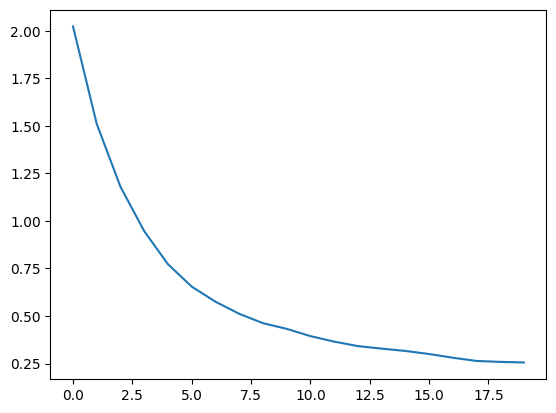

In [19]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

In [20]:
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print("Test Accurracy:", test_acc)
print("Test Loss:", test_loss)

94/94 - 0s - loss: 0.3117 - accuracy: 0.9120 - 224ms/epoch - 2ms/step
Test Accurracy: 0.9120000004768372
Test Loss: 0.3117133677005768


### Example Transfer Learning: Digit Number Recognization

#### Import Library

In [21]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical


#### Process Data

In [29]:
data = pd.read_csv('./Dataset.csv')
X_value = tf.convert_to_tensor(data.drop(['label'], axis = 1))
X_value = np.reshape(X_value, (-1, 28, 28))
X_value = np.repeat(X_value[..., np.newaxis], 3, axis=-1)
X_value = tf.image.resize(X_value, [224, 224])

Y_value = tf.convert_to_tensor(data['label'])
Y_value = to_categorical(Y_value, num_classes=10)


train_test_ratio = 0.7 

X_train = X_value[:int(len(X_value) * train_test_ratio)]
Y_train = Y_value[:int(len(Y_value) * train_test_ratio)]

X_test = X_value[int(len(X_value) * train_test_ratio):]
Y_test = Y_value[int(len(Y_value) * train_test_ratio):]


#### ResNet50

In [35]:
# Load ResNet50 without the top layer, include ImageNet weights
resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of ResNet50
resnet.trainable = False

model = Sequential([
    resnet,
    Flatten(),
    Dense(250, activation='sigmoid'),
    Dense(100, activation='sigmoid'), 
    Dense(20, activation='sigmoid'), 
    Dense(10, activation='softmax')  # For 10 classes
])

model.compile(optimizer=Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense_20 (Dense)            (None, 250)               25088250  
                                                                 
 dense_21 (Dense)            (None, 100)               25100     
                                                                 
 dense_22 (Dense)            (None, 20)                2020      
                                                                 
 dense_23 (Dense)            (None, 10)                210       
                                                                 
Total params: 48703292 (185.79 MB)
Trainable params: 2

#### Train

In [36]:
history = model.fit(X_train, Y_train, epochs=3, validation_split=0.2)

test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f'Test Accuracy: {test_accuracy}')


Epoch 1/3
175/175 [==============================] - 185s 1s/step - loss: 1.6084 - accuracy: 0.7188 - val_loss: 1.0752 - val_accuracy: 0.9200
Epoch 2/3
175/175 [==============================] - 175s 999ms/step - loss: 0.8010 - accuracy: 0.9325 - val_loss: 0.6343 - val_accuracy: 0.9443
Epoch 3/3
94/94 [==============================] - 88s 938ms/step - loss: 0.4457 - accuracy: 0.9480
Test Accuracy: 0.9480000138282776


#### Plotting Graph

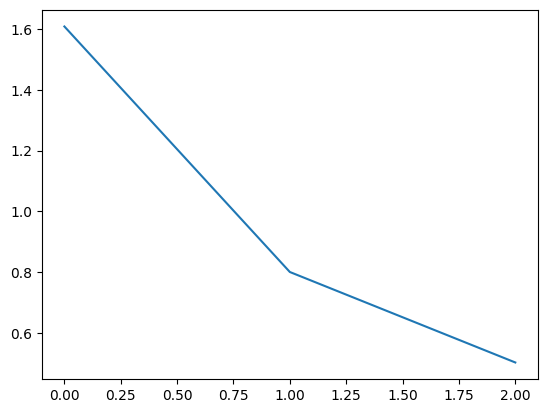

In [37]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])


In [38]:
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print("Test Accurracy:", test_acc)
print("Test Loss:", test_loss)

94/94 - 82s - loss: 0.4457 - accuracy: 0.9480 - 82s/epoch - 873ms/step
Test Accurracy: 0.9480000138282776
Test Loss: 0.4456879794597626
